In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("onlinefoods.csv")

In [6]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [8]:
df.drop(['Unnamed: 12'], axis=1, inplace = True)

Analysis of data using EDA

ONLINE FOOD ORDER DECISIONS BASED ON THE AGE OF THE CUSTOMER

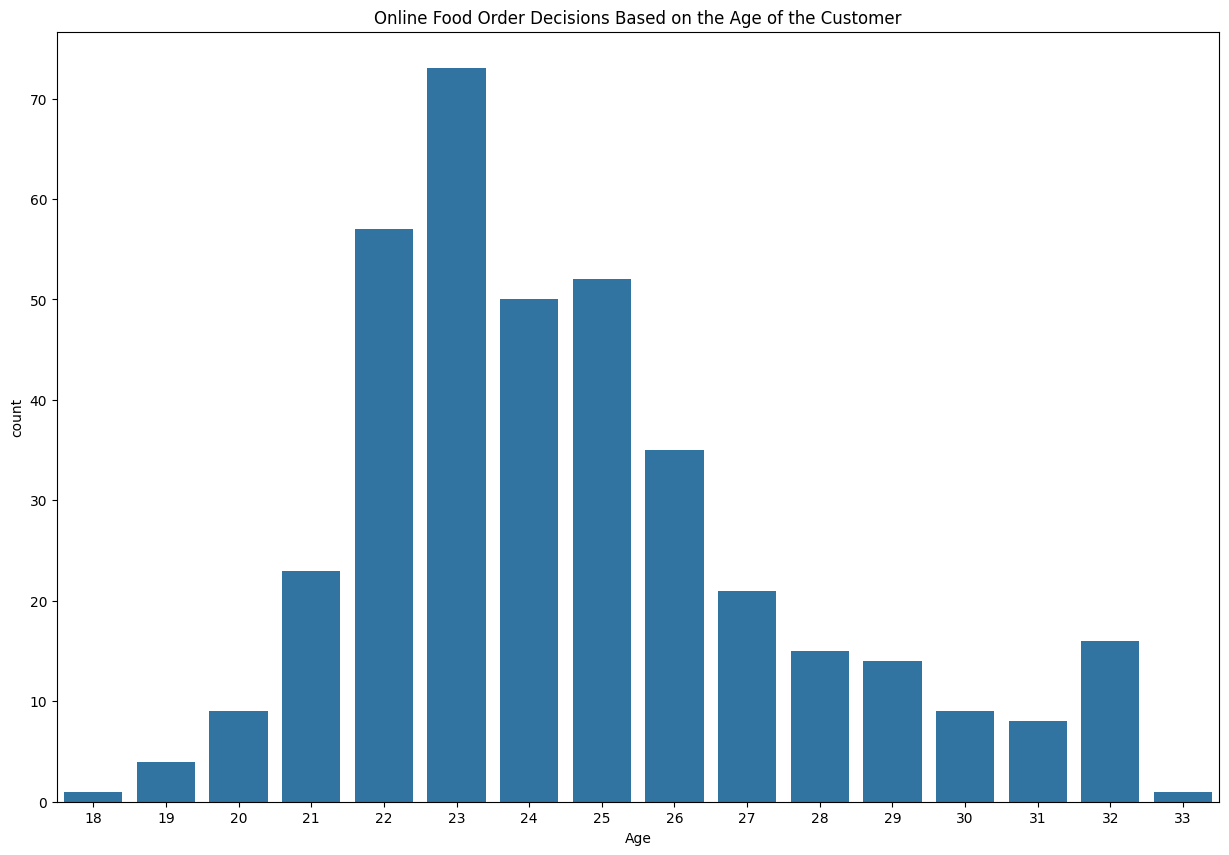

In [9]:
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
ax = sns.countplot(data=df, x = "Age", order=sorted(df['Age'].unique()))
ax.set_ylabel('count')
plt.show()

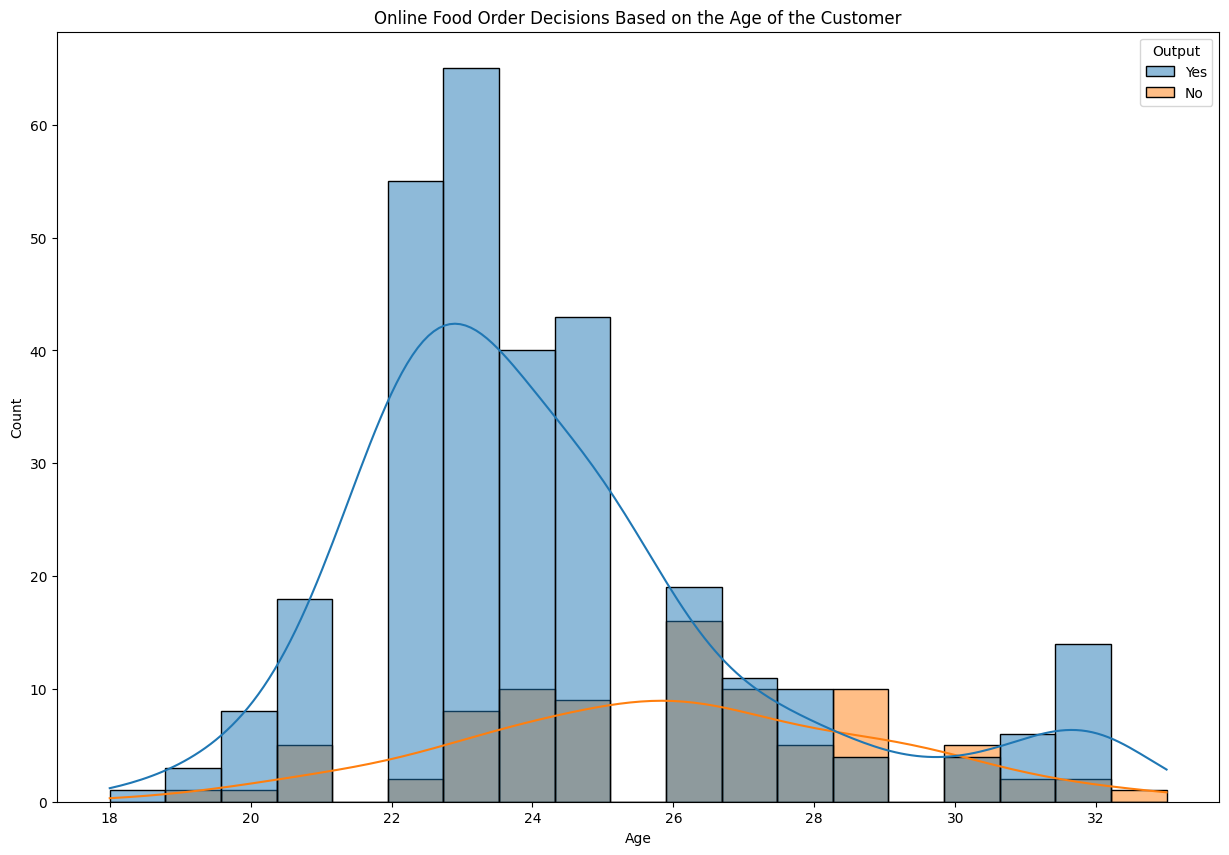

In [10]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", kde = True, data=df)
plt.show()

Summary: Age group of 22-25 ordered the food often again. This age group is the target of online food delivery companies.

ONLINE FOOD ORDER DECISIONS BASED ON THE SIZE OF THE FAMILY OF CUSTOMER

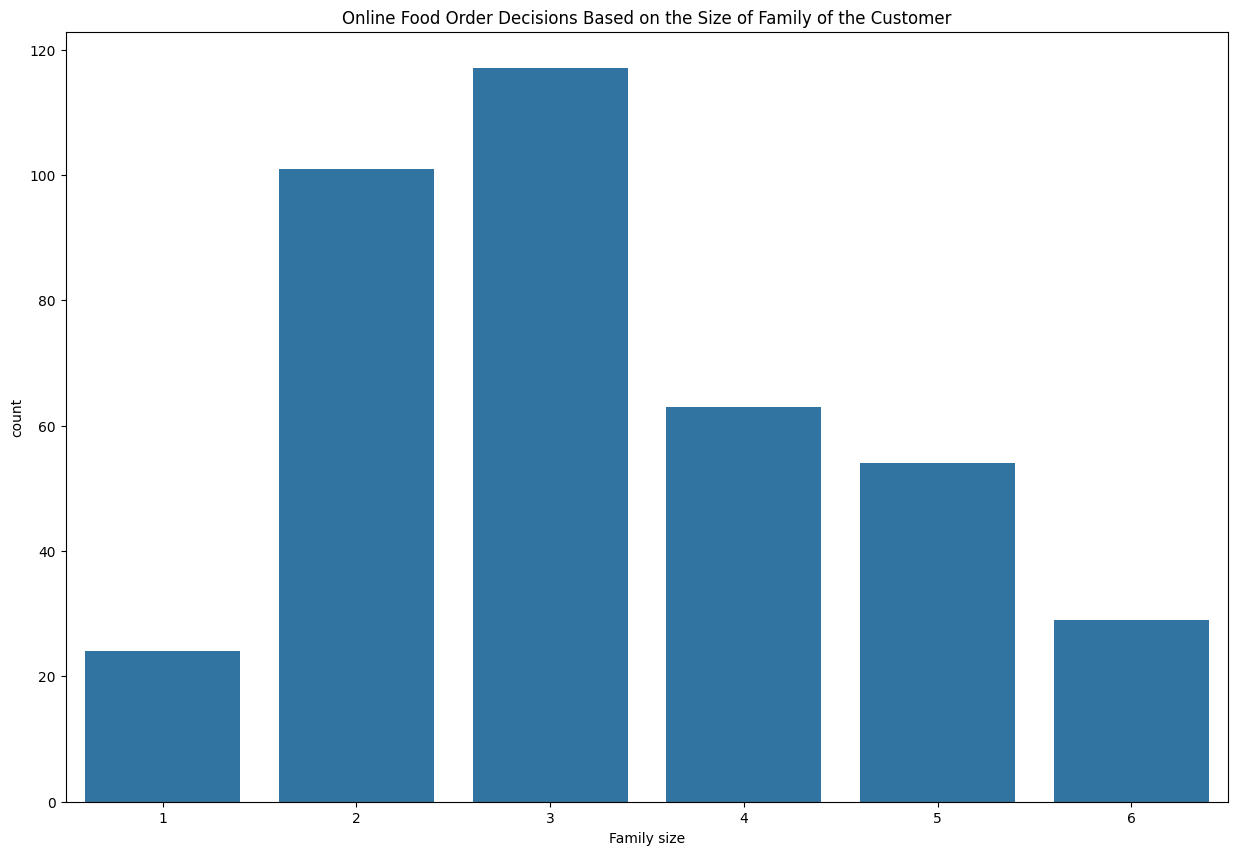

In [11]:
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on the Size of Family of the Customer")
ax = sns.countplot(data=df, x = "Family size", order=sorted(df['Family size'].unique()))
ax.set_ylabel('count')
plt.show()

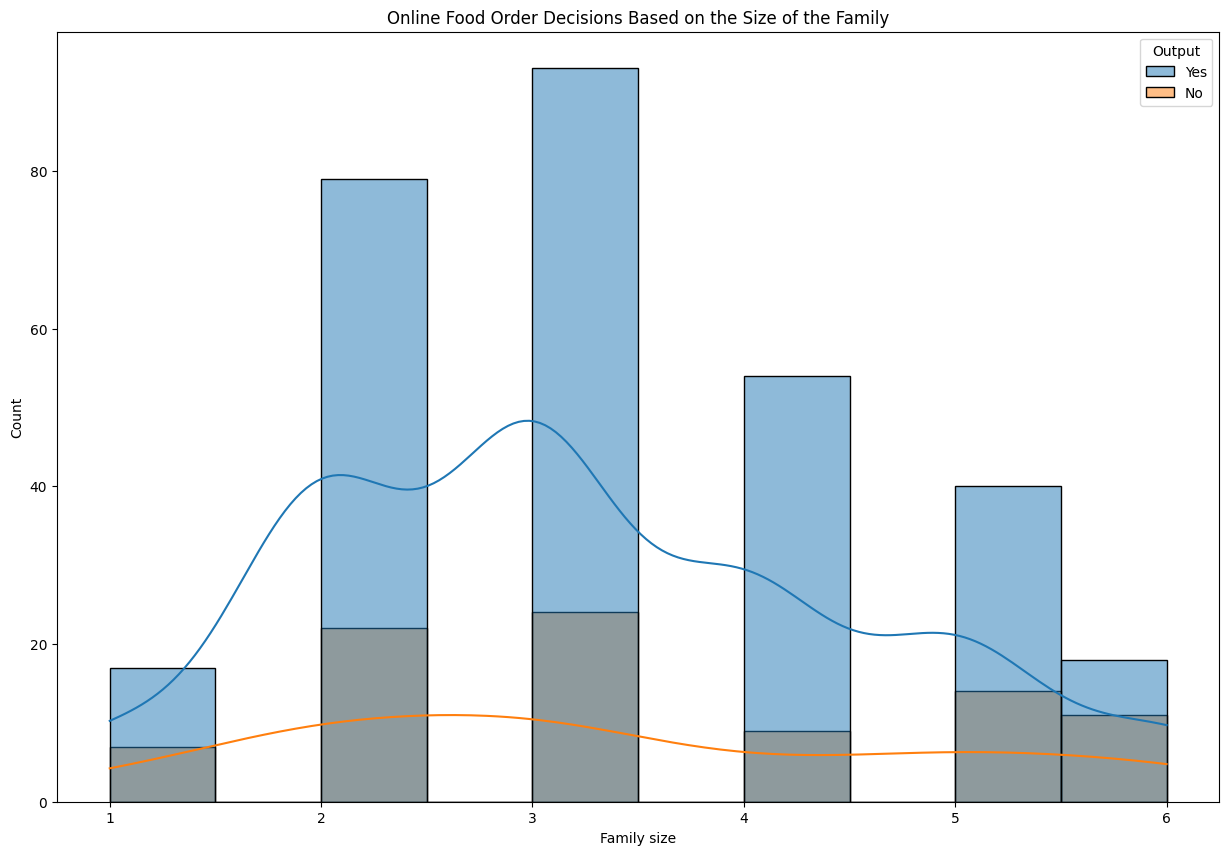

In [12]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", kde = True, hue="Output", data=df)
plt.show()

Summary: Families with 2 or 3 members are ordering food often

Let's create the dataset df1 of all the customers who are ordering food again

In [13]:
df1 = df.query("Output == 'Yes'")

In [14]:
df1

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive


LOOKING AT THE GENDER COLUMN. WHO ORDERS FOOD OFTEN, MALE OR FEMALE?

In [15]:
gender = df1["Gender"].value_counts()
label = gender.index
count = gender.values
fig = go.Figure(data = [go.Pie(labels=label, values = count)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict( line=dict(color='black', width=2)))
fig.show()

According to above pie chart, male customers have ordered more compared to females

CONVERTING CATEGORICAL INTO NUMERCIAL VALUES

In [16]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Marital Status"] = df["Marital Status"].map({"Married": 2, "Single": 1, "Prefer not to say": 0})
df["Occupation"] = df["Occupation"].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, "25001 to 50000": 5000, "More than 50000": 7000, "10001 to 25000": 25000, "Below Rs.10000": 10000})
df["Feedback"] = df["Feedback"].map({"Positive": 1, "Negative ": 0})

In [17]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1


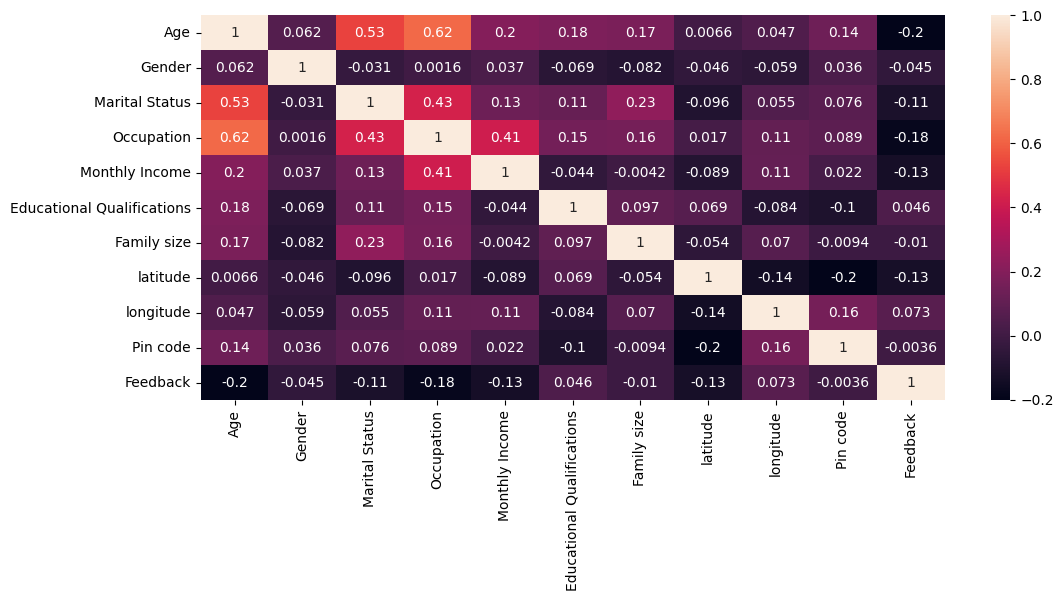

In [18]:
# Recalculate the correlation matrix, explicitly setting numeric_only
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)  # Set numeric_only to True
plt.show()

TRAINING ML MODEL

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
x = np.array(df[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code", "Feedback"]])
y = np.array(df[["Output"]])

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

# Reshape ytrain to a 1D array
ytrain = ytrain.ravel()  # Flatten the array

model1 = RandomForestClassifier()
model1.fit(xtrain, ytrain)

# ... rest of your code

RandomForestClassifier()

In [21]:
o1 = model1.score(xtest, ytest)
ypred1 = model1.predict(xtest)
print(o1)
print(confusion_matrix(ytest,ypred1))

0.9487179487179487
[[ 3  1]
 [ 1 34]]


In [22]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [24]:
o2 = model2.score(xtest, ytest)
print(o2)
ypred2 = model2.predict(xtest)
print(confusion_matrix(ytest,ypred2))

0.8974358974358975
[[ 0  4]
 [ 0 35]]


In [25]:
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()
model3.fit(xtrain,ytrain)

GaussianNB()

In [26]:
o3 = model3.score(xtest, ytest)
print(o3)
ypred3 = model3.predict(xtest)
print(confusion_matrix(ytest,ypred3))

0.7948717948717948
[[ 3  1]
 [ 7 28]]


In [27]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(xtrain, ytrain)

SVC()

In [28]:
o4 = model4.score(xtest, ytest)
print(o4)
ypred4 = model4.predict(xtest)
print(confusion_matrix(ytest, ypred4))

0.8974358974358975
[[ 0  4]
 [ 0 35]]


In [29]:
from sklearn import tree
model5=tree.DecisionTreeClassifier()
model5.fit(xtrain, ytrain)


DecisionTreeClassifier()

In [30]:
o5 = model5.score(xtest, ytest)
print(o5)
ypred5 = model5.predict(xtest)
print(confusion_matrix(ytest, ypred5))

0.8717948717948718
[[ 2  2]
 [ 3 32]]


In [31]:
from sklearn.ensemble import AdaBoostClassifier
model6 = AdaBoostClassifier()
model6.fit(xtrain, ytrain)

AdaBoostClassifier()

In [32]:
o6 = model6.score(xtest, ytest)
print(o6)
ypred6 = model6.predict(xtest)
print(confusion_matrix(ytest, ypred6))

0.9487179487179487
[[ 3  1]
 [ 1 34]]


In [33]:
accuracy_score = [o1,o2,o3,o4,o5,o6]
name = ["Random Forest", "Logistic Regression","Gaussian NB","SVC", "Decision Tree", "AdaBoost"]
clf = {
    'Random forest':o1,
    'Logistic Regression':o2,
    'GaussianNB':o3,
    'SVC':o4,
    'Decision Tree':o5,
    'AdaBoost':o6
}

In [34]:
for name, accuracy in clf.items():
    print("For ", name)
    print("Accuracy - ", accuracy)

For  Random forest
Accuracy -  0.9487179487179487
For  Logistic Regression
Accuracy -  0.8974358974358975
For  GaussianNB
Accuracy -  0.7948717948717948
For  SVC
Accuracy -  0.8974358974358975
For  Decision Tree
Accuracy -  0.8717948717948718
For  AdaBoost
Accuracy -  0.9487179487179487


In [35]:
performance_df = pd.DataFrame({'Algorithm':clf.keys(),'Accuracy':clf.values()}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy
0,Random forest,0.948718
5,AdaBoost,0.948718
1,Logistic Regression,0.897436
3,SVC,0.897436
4,Decision Tree,0.871795
2,GaussianNB,0.794872


In [36]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,Random forest,Accuracy,0.948718
1,AdaBoost,Accuracy,0.948718
2,Logistic Regression,Accuracy,0.897436
3,SVC,Accuracy,0.897436
4,Decision Tree,Accuracy,0.871795
5,GaussianNB,Accuracy,0.794872


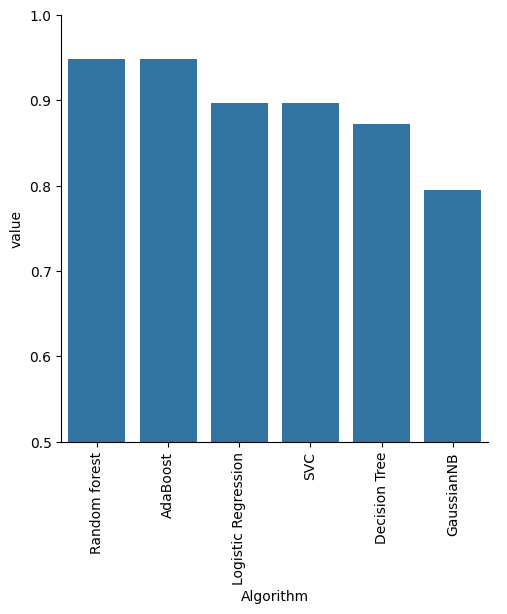

In [37]:
sns.catplot(x = 'Algorithm', y='value',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# ANALYSIS: Random Forest and AdaBoost classifier gives the highest accuracy



---







TAKING USER DATA AND PREDICTING WHETHER CUSTOMER WILL ORDER THE FOOD AGAIN OR NOT

In [38]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model1.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 24
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 3
Monthly Income: 0
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 3
Pin Code: 1
Review of the Last Order (1 = Positive, 0 = Negative): 1
Finding if the customer will order again:  ['Yes']


**THIS IS HOW ML MODEL PREDICTS ONLINE FOOD ORDERS**